#**Deep Learning Homework 3: Convolutional Neural Networks**

### MSc Computer Science, Data Science, Cybersecurity @UniPD
### 2nd semester - 6 ECTS
### Prof. Nicolò Navarin & Prof. Alessandro Sperduti
---
In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the CIFAR-10 dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: CIFAR-10 dataset


We will use the CIFAR-10 dataset.The dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each sample is a 32x32 pixels color image, associated with a label from 10 classes:

```
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
```

Each pixel intensity is represented by a `uint8` (byte) from 0 to 255.
We will divide the dataset in training, testing and validation set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one and in color images is 3). Therefore, if you are using grayscale images use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims#:~:text=Used%20in%20the%20notebooks,-Used%20in%20the&text=This%20operation%20is%20useful%20to,to%20a%20tensor%20of%20scalars) to transform each image from a matrix to a 3-dimensional tensor. Finally, we have to normalize the input data.

In [2]:
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training

# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


170508288/170498071 [==============================] - 23s 0us/step


Let's take a look at a sample of the images in the dataset:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

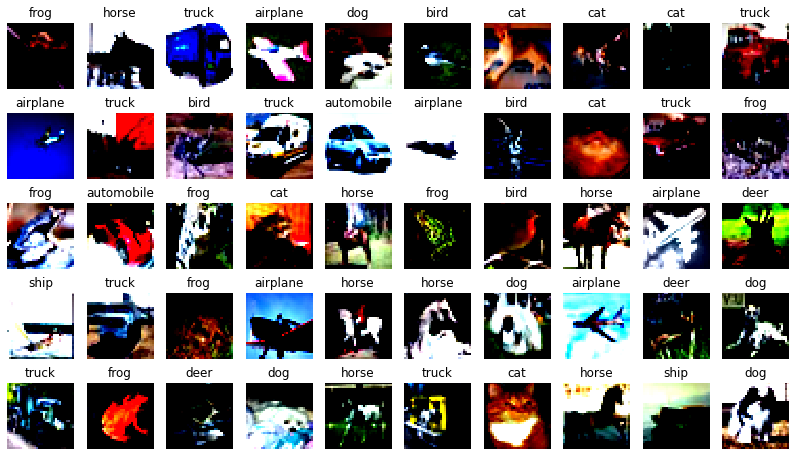

In [15]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [3]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)


X_train = (X_train - X_train.mean(axis=0)) / (X_train.std(axis=0))
X_valid = (X_valid - X_valid.mean(axis=0)) / (X_valid.std(axis=0))
X_test = (X_test - X_test.mean(axis=0)) / (X_test.std(axis=0))


#Add one dimension to manage the channel if you are using grayscale images.
#X_train=tf.expand_dims(X_train, 3) 
#X_valid=tf.expand_dims(X_valid, 3) 
#X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set
print(X_train.shape)

(45000, 32, 32, 3)


In [16]:
def showImg() :
  n_rows = 5
  n_cols = 10
  plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
  for row in range(n_rows):
      for col in range(n_cols):
          index = n_cols * row + col
          plt.subplot(n_rows, n_cols, index + 1)
          plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
          plt.axis('off')
          plt.title(class_names[y_train[index][0]])
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

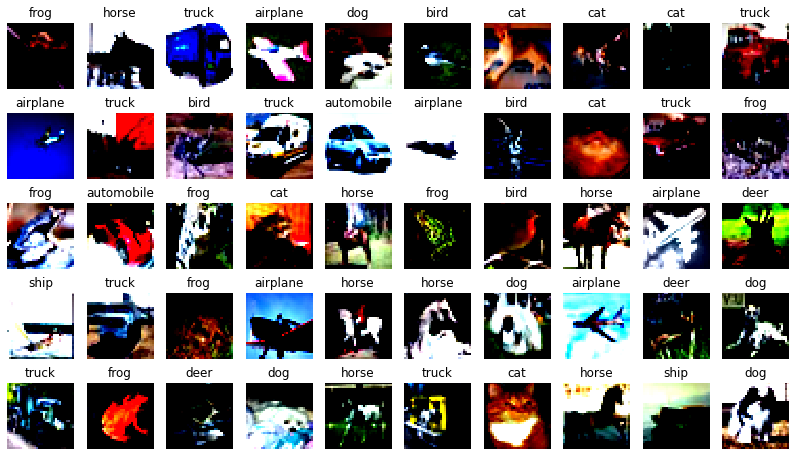

In [17]:
showImg()

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [18]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


Print the model summary

In [19]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 8192)              0         
                                                                 
 dense_13 (Dense)            (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [20]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 30s 84ms/step - loss: 1.4465 - accuracy: 0.4950 - val_loss: 1.2265 - val_accuracy: 0.5676
Epoch 2/10
352/352 [==============================] - 29s 83ms/step - loss: 1.1403 - accuracy: 0.6062 - val_loss: 1.1132 - val_accuracy: 0.6074
Epoch 3/10
352/352 [==============================] - 29s 83ms/step - loss: 1.0241 - accuracy: 0.6455 - val_loss: 1.0575 - val_accuracy: 0.6404
Epoch 4/10
352/352 [==============================] - 29s 83ms/step - loss: 0.9568 - accuracy: 0.6722 - val_loss: 1.0662 - val_accuracy: 0.6338
Epoch 5/10
352/352 [==============================] - 30s 84ms/step - loss: 0.9016 - accuracy: 0.6926 - val_loss: 1.0386 - val_accuracy: 0.6466
Epoch 6/10
352/352 [==============================] - 29s 83ms/step - loss: 0.8677 - accuracy: 0.7038 - val_loss: 1.0393 - val_accuracy: 0.6378
Epoch 7/10
352/352 [==============================] - 29s 83ms/step - loss: 0.8349 - accuracy: 0.7131 - val_loss: 1.0157 - val_accuracy:

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 3s - loss: 1.0510 - accuracy: 0.6506 - 3s/epoch - 8ms/step
accuracy: 65.06%


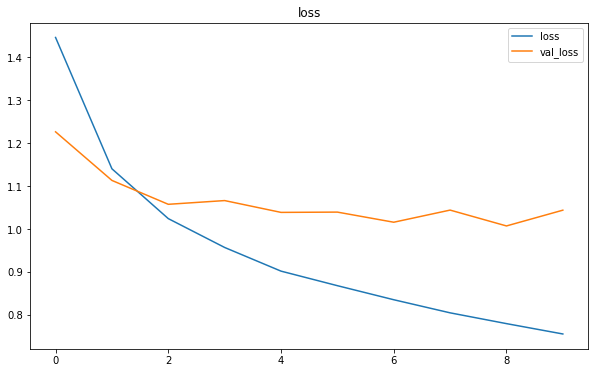

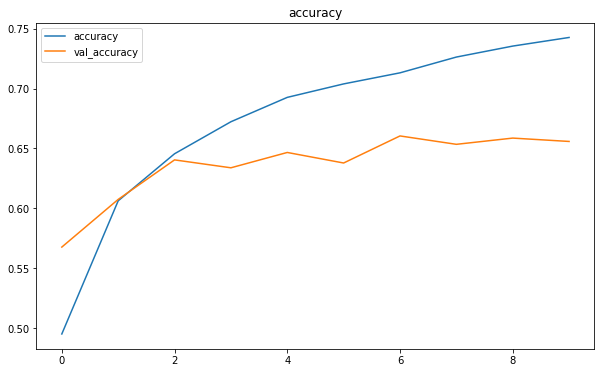

In [21]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

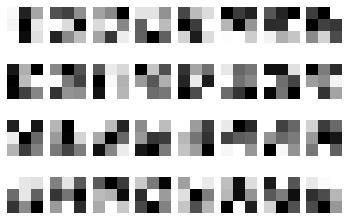

In [22]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [23]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 10)              

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   The number of parameters on each of the two Conv2D layers is determined as following:
<br><br>
$$n_{param} = ((width_{filter} * height_{filter} * n_{filter} \ of \ the \ previous \ layer ) + 1) * n_{filters}$$
<br><br>
So, the computation for the two convolutional level is done is this way:


*   First convolutional layer: ((3 * 3 * 3) + 1) * 32 = 896
*   Second convolutional layer: ((2 * 2 * 32) + 1) * 16 = 2064


2.   The two considered convolutional layers have a different number of parameters since they have different kernel sizes, different input layer sizes, and different number of filters. The computation is explained in the first answer.

Let's now train our deep CNN.

Epoch 1/10
352/352 [==============================] - 32s 91ms/step - loss: 1.6141 - accuracy: 0.4241 - val_loss: 1.3647 - val_accuracy: 0.5270
Epoch 2/10
352/352 [==============================] - 32s 91ms/step - loss: 1.2765 - accuracy: 0.5526 - val_loss: 1.1830 - val_accuracy: 0.5912
Epoch 3/10
352/352 [==============================] - 32s 91ms/step - loss: 1.1551 - accuracy: 0.5962 - val_loss: 1.1172 - val_accuracy: 0.6156
Epoch 4/10
352/352 [==============================] - 32s 90ms/step - loss: 1.0806 - accuracy: 0.6264 - val_loss: 1.0697 - val_accuracy: 0.6228
Epoch 5/10
352/352 [==============================] - 32s 90ms/step - loss: 1.0374 - accuracy: 0.6389 - val_loss: 1.0250 - val_accuracy: 0.6380
Epoch 6/10
352/352 [==============================] - 32s 90ms/step - loss: 0.9967 - accuracy: 0.6557 - val_loss: 1.0389 - val_accuracy: 0.6476
Epoch 7/10
352/352 [==============================] - 32s 90ms/step - loss: 0.9658 - accuracy: 0.6682 - val_loss: 0.9994 - val_accuracy:

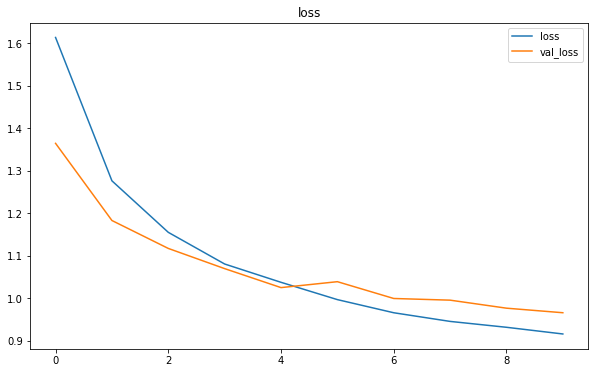

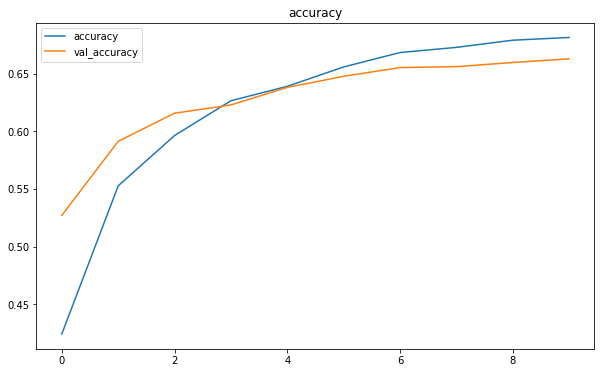

In [24]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

Epoch 1/50
352/352 [==============================] - 267s 758ms/step - loss: 1.7742 - accuracy: 0.3386 - val_loss: 1.3695 - val_accuracy: 0.5056
Epoch 2/50
352/352 [==============================] - 266s 755ms/step - loss: 1.3224 - accuracy: 0.5220 - val_loss: 1.0769 - val_accuracy: 0.6218
Epoch 3/50
352/352 [==============================] - 267s 758ms/step - loss: 1.1394 - accuracy: 0.5953 - val_loss: 0.9453 - val_accuracy: 0.6648
Epoch 4/50
352/352 [==============================] - 266s 756ms/step - loss: 1.0130 - accuracy: 0.6441 - val_loss: 0.8301 - val_accuracy: 0.7102
Epoch 5/50
352/352 [==============================] - 264s 749ms/step - loss: 0.9347 - accuracy: 0.6738 - val_loss: 0.7748 - val_accuracy: 0.7292
Epoch 6/50
352/352 [==============================] - 263s 746ms/step - loss: 0.8568 - accuracy: 0.7021 - val_loss: 0.7139 - val_accuracy: 0.7494
Epoch 7/50
352/352 [==============================] - 263s 748ms/step - loss: 0.8144 - accuracy: 0.7181 - val_loss: 0.6835 -

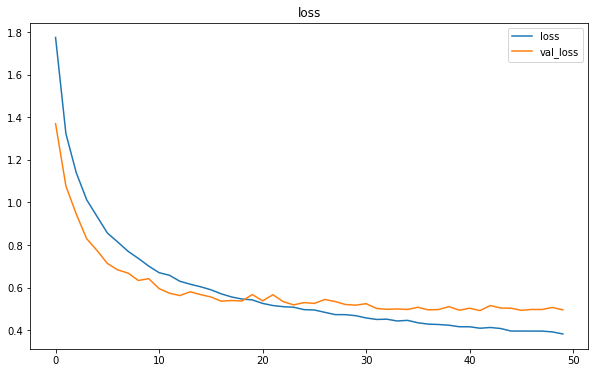

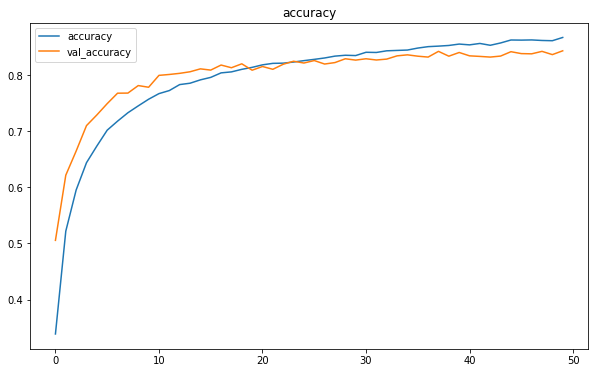

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3], padding = 'same'))
model.add(Conv2D(filters=32, kernel_size=[3,3], activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (2, 2), activation='relu', padding = 'same'))
model.add(Conv2D(64, (2, 2), activation='relu', padding = 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")
    


### [TO COMPLETE] Example of tests discussion
The best model that I found is the one described in the cell above, that is able to achieve an accuracy of 83.23%. 
</br>
All the steps to reach this type of model are explained below, starting from a very simple model and trying a re-parametrization for the different categories.
</br>
Briefly, the final model is composed by 6 convolutional layer, grouped by 2 with number of filters 32, 64 and 128. After every group of convolutional layers there is the max pooling layer.
<br> Other than that, dropout layers have been added in order to avoid overfitting and reach better performances. 
<br> Finally, there are the flatten layer, and 2 dense layers, one with 128 neurons with ReLU as activation function and the other with 10 neurons and softmax activation that represent the output layer of the classification network.
<br>
The model has been trained with adam as optimizer, and sparse categorical loss entropy as loss function, for 50 epochs and using batches of 128 samples.

The achieved accuracy in the test set is 83.23 %.

Discussion:
<br>
Since the accuracy seems to decrease as the number of epochs increases, thanks to the dropout layers that prevent overfitting, I guess that increasing some more the number of epochs might lead to even better performances. 
However, the running times (on Colab) are very long and I wasn't able to go beyond this performance. 

Besides, I tested also other models: 
* First of all, I tried adding some more convolutional layers. I added a second and equal convolutional layer right after the existing ones in the final 3.2 model. I obtained a slight increase of the performances, leading to 67.34 % of accuracy.
* Then, I increased substantially the number of filters in each convolutional layer. Taking inspiration by an existing example found on the net, the model is now composed by 2 conv layers with 32 filters of size 3x3, a max pool layer, 2 conv layers with 64 filters of size 2x2, a max pool layer, again 2 conv layers with 128 filters of size 3x3, followed as usual by a max pool layer, and finally the flatten and dense layers. The increment of accuracy with this new trained model was huge, reaching 75,18 %.
* Next, I made some small changes. First, I added padding = 'same' in order to avoid "shrinking" the dimension of the matrices as they went through the network. I also added a dense layer before the last output layer, of 128 neurons with ReLU as activation function. This led to 75.95 % accuracy. 
</br>
Furthermore, I added the dropout layers, as you can see in the last cell of code of the notebook, with different rate at each step; this helped avoiding overfitting, and reached accuracy of 77.13 %.
* At this point, I tried other optimizer to reach better performances. I used SGD with learning rate = 0.001 and momentum = 0.9 but I reached very bad performances; I guess the learning rate was too low in according to the small number of epochs (10). 
</br>
Then, I moved back to adpative optimizer, trying RMSprop and reaching more or less the same accuracy (77.49 %, slightly better) but a bit worse loss.
* I tried also to change the batch size. I did one experiment halfing it (batch size = 64), reaching a worse 75.47% accuracy, and doubling it (batch size = 256), leading to a worse 76.20% as well. So, I intuitively set the batch size back to 128.
* The last experiments I did were that ones of changing the number of epochs: first I tried with 20 epochs: using RMSprop as optimizer I reached a 77.77 % of accuracy, while using ADAM I was able to increase it to 80.34 %. 
</br>
Finally, I ran the model for 50 epochs, leading to the results descripted above (accuracy = 83.23 %).